# Business Applications of Hypothesis Testing and Confidence Interval Estimation


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t

In [2]:
quiz_data = pd.read_excel("Excel files/1. Confidence Interval.xlsx", "Sheet1", index_col=None, na_values=["NA"])

In [3]:
quiz_data.head()

,Manager ID,Stock Return
0,1,23.22
1,2,7.95
2,3,16.38
3,4,1.02
4,5,12.34


In [4]:
1-t.cdf(1.3,21)

0.10384478910685135

1.

Suppose we have a t-distribution symmetrically dispersed
around mean of 0, with degrees of freedom 10. 

What is the probability that a random value from this distribution will be
greater than 1? Round to 2 decimal places. 

In [5]:
round(1-t.cdf(1,10),2)

0.17

2.

Similarly, what is the probability that the value will fall between -1 and 1? Round to two decimals. 

In [6]:
round(t.cdf(1,10) - t.cdf(-1,10),2)

0.66

3.

![1_Distribution-1](Images/1_Distribution-1.png)

In the t-distribution with 10 degrees of freedom given above, what is the correct formula to calculate the value that cuts of a probability of 10% to the left of that value?

In [7]:
t.ppf(0.1, 10)

-1.3721836411102861

4.

The quiz data shows how a sample of portfolio managers fared on the stock market for the previous year. The numbers are in 'percentage', for example a stock return of 23.22 implies that the stock return was 23.22%. Each number represents a manager's most recent annual return.

Construct a histogram with an appropriate bin size to visualize the data. How are the returns distributed? Choose the most appropriate option from the following.

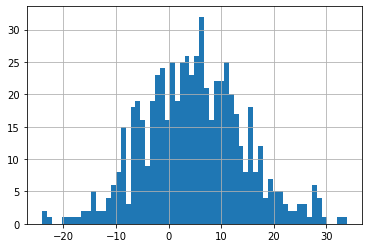

In [8]:
quiz_data["Stock Return"].hist(bins=len(quiz_data)//10) # Normal distribution

5.

What is the average return for the sample of portfolio managers in the data? For the rest of the quiz, provide your answer rounded to two decimal places.

In [9]:
round(quiz_data["Stock Return"].mean(),2)

4.76

6.

What is the sample standard deviation of return for the portfolio managers? Provide your answer rounded to two decimal places.

In [10]:
round(quiz_data["Stock Return"].std(),2)

9.55

7.

Suppose we know that the actual population standard deviation is 9 (i.e. 9%). We wish to construct a confidence interval for the average return for the population of portfolio managers. Use the value of zα/2 to be 2. What is the resulting confidence interval?

HINT: Please use the formula for confidence interval of a population mean using the z-statistic.

In [11]:
from math import sqrt

In [12]:
margin_of_error = 2 * (9/sqrt(len(quiz_data)))
sample_mean = quiz_data["Stock Return"].mean()
lower_bound = round(sample_mean - margin_of_error, 2)
higher_bound = round(sample_mean + margin_of_error, 2)
print(f"Confidence interval: [{lower_bound}, {higher_bound}]")

Confidence interval: [4.04, 5.48]


8.

How many portfolio returns in the data lie within this confidence interval?

HINT: you can either use the COUNTIF function or sort the data and then manually count the observations

In [13]:
len(quiz_data[(quiz_data["Stock Return"] >= lower_bound) & (quiz_data["Stock Return"] <= higher_bound)])

34